# The company XYZ (similar to YouTube/Dailymotion) faces a tough problem. Users are entering their home page but proceed to leave it directly without taking any action or watching any video. Currently, the videos on the home page are manually chosen, but to cope with this problem the head of product came up with the idea to create a new recommended videos section on the home page. 
# 1. The head of product has asked the following, first classify each video into 3 groups:
# 'Top'
# 'Good'
# 'Everything else'
# 2. what are the main characteristics of 'Top' videos? And how would you use this information from a product standpoint? (i.e., how would you use this information to make the product better?) 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [3]:
df=pd.read_csv('video_count - video_count.csv')
df

,video_id,date,count
0,1,2017-09-11,169
1,1,2017-09-12,160
2,1,2017-09-13,161
3,1,2017-09-14,94
4,1,2017-09-15,133
...,...,...,...
11898,100,2018-02-18,48
11899,100,2018-02-19,55
11900,100,2018-02-20,64
11901,100,2018-02-21,69


In [4]:
df['count'].describe()

count    11903.000000
mean        75.427623
std         33.011251
min          6.000000
25%         51.000000
50%         72.000000
75%         97.000000
max        196.000000
Name: count, dtype: float64

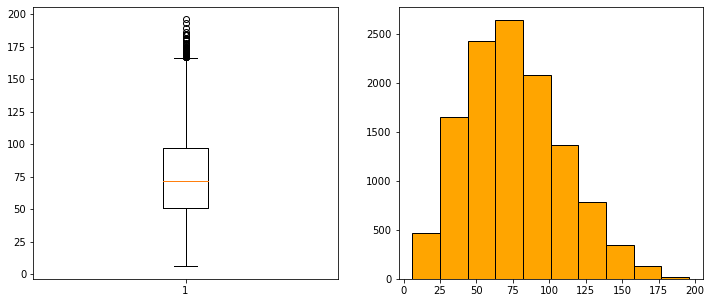

In [5]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.boxplot(df['count'])

plt.subplot(1,2,2)
plt.hist(df['count'], edgecolor='black', color='orange' )
plt.show()
# We can see that the data has outliers and that it is skewed to the right.

<AxesSubplot:xlabel='count', ylabel='Count'>

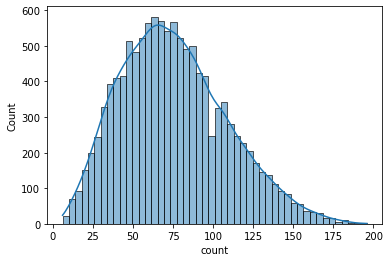

In [7]:
sns.histplot(df['count'], kde=True)
#This graph shows use the distribution of the num of views of a video by frequency.

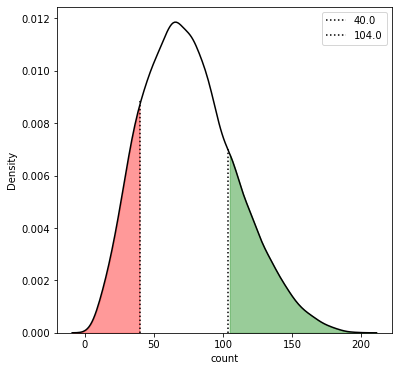

In [8]:
x=df['count']
plt.figure(figsize=(6,6))
ax=sns.kdeplot(x, shade=False, color='k')
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
left, middle, right = np.percentile(x, [15,65,80])
ax.vlines(left, 0, 0.0089, ls=':', label=str(np.percentile(x,15)),color='k')
ax.vlines(right, 0, 0.007, ls=':',label=str(np.percentile(x,80)), color='k')
plt.legend(loc='upper right')
ax.fill_between(xs, 0, ys, where=(left >= xs), color='r',alpha=0.4, interpolate=True)
ax.fill_between(xs, 0, ys,where=(xs > right), color='g',alpha=0.4,interpolate=True)
plt.show()
# Looking at the way the the count data is distributed above i decided to split data into 3 percentiles:
#15th (everything else category), 65th (good category), 80th percentile (Top category).

In [9]:
# Now that we know the value (number of views) for each category we can divide each video in the dataset to the correct category 
# by frequency (number of days) in which a video had a certain number of views.
df['class']=pd.cut(df['count'], [5,40, 103,197], labels=['Everything Else','Good','Top'])
grouped_df=df.groupby('video_id')
a=grouped_df.describe(include=['category'])
b=a['class']
b.reset_index(inplace=True)
b

,video_id,count,unique,top,freq
0,1,120,2,Top,68
1,2,119,2,Good,83
2,3,119,2,Everything Else,95
3,4,119,2,Top,84
4,5,119,2,Good,69
...,...,...,...,...,...
95,96,118,2,Good,101
96,97,119,3,Good,105
97,98,121,2,Good,72
98,99,118,3,Good,109


In [10]:
# Top table: 
Top=b.where(b['top']=='Top')
Top.dropna(inplace=True)
Top=Top.astype({'video_id':'int'})
Top

,video_id,count,unique,top,freq
0,1,120,2,Top,68
3,4,119,2,Top,84
6,7,120,2,Top,66
17,18,117,2,Top,66
33,34,119,2,Top,62
43,44,120,2,Top,78
50,51,118,2,Top,77
51,52,118,2,Top,86
53,54,115,2,Top,61
56,57,121,2,Top,97


In [11]:
# Good table: 
Good=b.where(b['top']=='Good')
Good.dropna(inplace=True)
Good=Good.astype({'video_id':'int'})
Good

,video_id,count,unique,top,freq
1,2,119,2,Good,83
4,5,119,2,Good,69
7,8,119,2,Good,79
8,9,121,2,Good,75
9,10,119,3,Good,111
...,...,...,...,...,...
95,96,118,2,Good,101
96,97,119,3,Good,105
97,98,121,2,Good,72
98,99,118,3,Good,109


In [12]:
# Everything Else table: 
Everything_Else=b.where(b['top']=='Everything Else')
Everything_Else.dropna(inplace=True)
Everything_Else=Everything_Else.astype({'video_id':'int'})
Everything_Else

,video_id,count,unique,top,freq
2,3,119,2,Everything Else,95
5,6,119,2,Everything Else,82
24,25,119,2,Everything Else,77
26,27,116,2,Everything Else,82
29,30,118,2,Everything Else,69
31,32,118,2,Everything Else,79
46,47,119,2,Everything Else,85
63,64,119,2,Everything Else,82
66,67,120,2,Everything Else,77
75,76,121,2,Everything Else,95


In [16]:
# Now we can merge each table with the video features table and look for the characteristics of the videos in each category
# I'll start by the top category videos:
df2=pd.read_csv('video_features.csv') 
df2
Top_feat=pd.merge (Top, df2, how='left', left_on='video_id', right_on='video_id')
Top_feat

,video_id,count,unique,top,freq,video_length,video_language,video_upload_date,video_quality
0,1,120,2,Top,68,16,chineese,2017-09-11,480p
1,4,119,2,Top,84,15,spanish,2017-10-12,720p
2,7,120,2,Top,66,15,spanish,2017-10-11,480p
3,18,117,2,Top,66,16,english,2017-09-16,360p
4,34,119,2,Top,62,17,chineese,2017-10-11,720p
5,44,120,2,Top,78,17,chineese,2017-09-17,1080p
6,51,118,2,Top,77,18,chineese,2017-09-19,1080p
7,52,118,2,Top,86,17,spanish,2017-10-22,1080p
8,54,115,2,Top,61,15,english,2017-09-25,480p
9,57,121,2,Top,97,15,spanish,2017-09-25,1080p


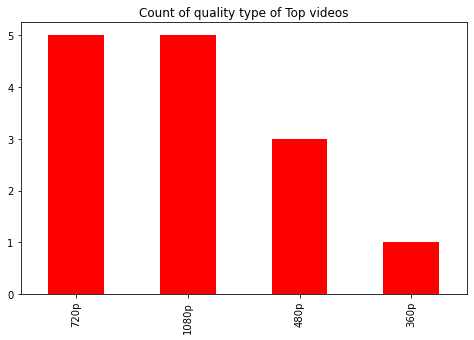

In [17]:
# We can see that there are 3 features - lenght, language, and quality. 
# Let's see what are the characteristics of the top videos in each feature. I'll start with quality:
plt.figure(figsize=(8,5))
Top_feat['video_quality'].value_counts().plot(kind='bar', title='Count of quality type of Top videos', color='red')
plt.show()

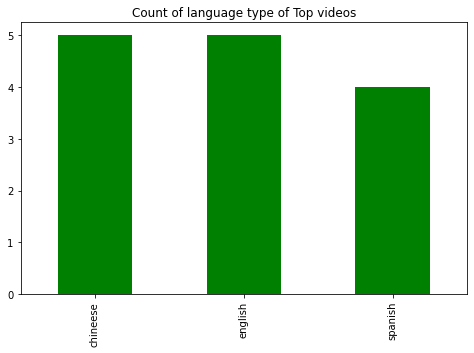

In [18]:
# We can see that top videos have a high number of videos that are in high quality. Let's look at language:
plt.figure(figsize=(8,5))
Top_feat['video_language'].value_counts().plot(kind='bar', title='Count of language type of Top videos', color='green')
plt.show()

In [19]:
# The language feature doesn't shows us something useful.. Let's look at the average length of top videos:
Top_feat['video_length'].mean()

16.0

In [20]:
# Now let's repeat the process with the good category.
Good_feat=pd.merge (Good, df2, how='left', left_on='video_id', right_on='video_id')
Good_feat

,video_id,count,unique,top,freq,video_length,video_language,video_upload_date,video_quality
0,2,119,2,Good,83,27,spanish,2017-10-03,480p
1,5,119,2,Good,69,19,chineese,2017-09-14,720p
2,8,119,2,Good,79,19,chineese,2017-10-09,480p
3,9,121,2,Good,75,18,chineese,2017-09-17,480p
4,10,119,3,Good,111,22,english,2017-10-23,360p
...,...,...,...,...,...,...,...,...,...
70,96,118,2,Good,101,20,spanish,2017-09-15,240p
71,97,119,3,Good,105,23,chineese,2017-09-11,480p
72,98,121,2,Good,72,28,chineese,2017-10-22,480p
73,99,118,3,Good,109,26,spanish,2017-10-21,1080p


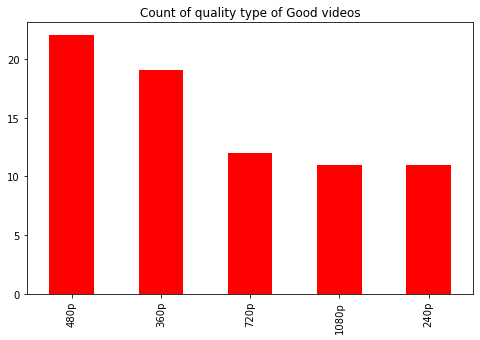

In [21]:
# Quality: 
plt.figure(figsize=(8,5))
Good_feat['video_quality'].value_counts().plot(kind='bar', title='Count of quality type of Good videos', color='red')
plt.show()

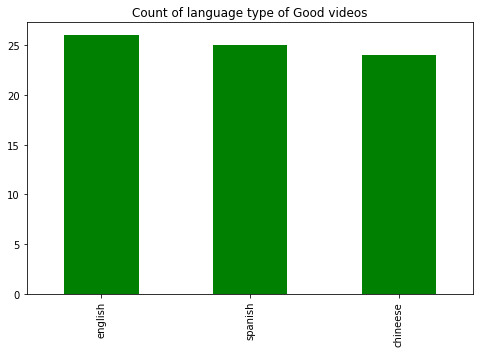

In [22]:
# We can see that a videos from the good category have a higher number of low quality videos, let's look at the language feature: 
plt.figure(figsize=(8,5))
Good_feat['video_language'].value_counts().plot(kind='bar', title='Count of language type of Good videos', color='green')
plt.show()

In [23]:
# Same as Top videos the language feature is not very useful, let's look at the average lenght of good videos: 
Good_feat['video_length'].mean()

22.933333333333334

In [24]:
# We can see that the average lenght is much higher than in the top video (6 seconds).
# Let's look for the features of Everything else videos: 
Everything_Else_feat=pd.merge (Everything_Else, df2, how='left', left_on='video_id', right_on='video_id')
Everything_Else_feat

,video_id,count,unique,top,freq,video_length,video_language,video_upload_date,video_quality
0,3,119,2,Everything Else,95,30,spanish,2017-10-06,240p
1,6,119,2,Everything Else,82,30,chineese,2017-09-29,360p
2,25,119,2,Everything Else,77,30,spanish,2017-10-08,480p
3,27,116,2,Everything Else,82,30,spanish,2017-10-03,360p
4,30,118,2,Everything Else,69,28,english,2017-10-13,240p
5,32,118,2,Everything Else,79,29,english,2017-09-07,240p
6,47,119,2,Everything Else,85,29,chineese,2017-10-15,240p
7,64,119,2,Everything Else,82,30,chineese,2017-09-27,480p
8,67,120,2,Everything Else,77,30,chineese,2017-10-07,360p
9,76,121,2,Everything Else,95,30,chineese,2017-10-13,240p


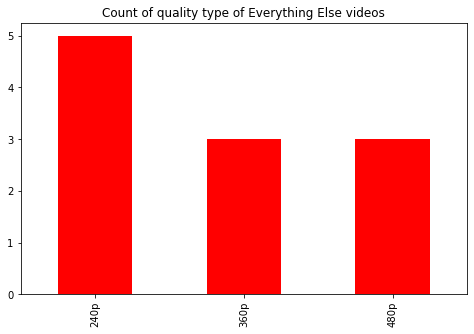

In [25]:
# Quality: 
plt.figure(figsize=(8,5))
Everything_Else_feat['video_quality'].value_counts().plot(kind='bar', title='Count of quality type of Everything Else videos', color='red')
plt.show()

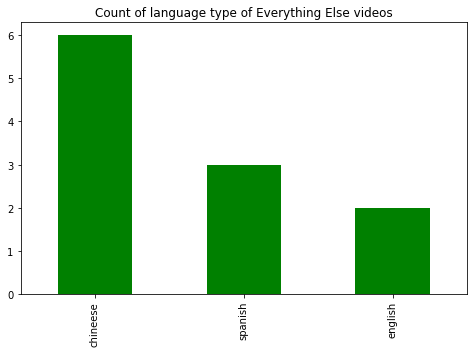

In [26]:
# Even worse than Good videos. Most of the videos in the everyhting else category are of poor quality. Language:
plt.figure(figsize=(8,5))
Everything_Else_feat['video_language'].value_counts().plot(kind='bar', title='Count of language type of Everything Else videos', color='green')
plt.show()

In [27]:
# Again nothing useful in the language feature, lenght: 
Everything_Else_feat['video_length'].mean()

29.636363636363637

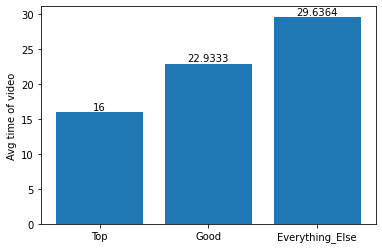

In [28]:
# As we can see 2 of the 3 features (quality and lenght) are useful to us in learning what are the characteristic features of top videos.
# Let's compare each category in these features to learn what are the differences between the top group and the two other groups. 
# First lenght: 
avg_time={'Top':Top_feat['video_length'].mean(),
          'Good':Good_feat['video_length'].mean(), 
          'Everything_Else':Everything_Else_feat['video_length'].mean()}

groups=list(avg_time.keys())
values=list(avg_time.values())

fig, ax = plt.subplots()
bars = ax.bar(groups, values)
ax.bar_label(bars)
plt.ylabel('Avg time of video')
plt.show()

In [29]:
# As we can see the longer the video the higher the probability that it will get less views. Let's compare the quality feature: 
a=Top_feat['video_quality'].value_counts().rename('number of videos').to_frame().reset_index()
b=Good_feat['video_quality'].value_counts().rename('number of videos').to_frame().reset_index()
c=Everything_Else_feat['video_quality'].value_counts().rename('number of videos').to_frame().reset_index()

a.rename(columns={'index':'quality'}, inplace=True)
b.rename(columns={'index':'quality'}, inplace=True)
c.rename(columns={'index':'quality'}, inplace=True)

a['type of video']=Top_feat['top']
b['type of video']=Good_feat['top']
c['type of video']=Everything_Else_feat['top']

quality=pd.concat([a,b,c])
quality

,quality,number of videos,type of video
0,720p,5,Top
1,1080p,5,Top
2,480p,3,Top
3,360p,1,Top
0,480p,22,Good
1,360p,19,Good
2,720p,12,Good
3,1080p,11,Good
4,240p,11,Good
0,240p,5,Everything Else


In [ ]:
# The quality feature shows us that the lower the quality of the video the higher the probability that it will get less views.

# Conclusion: The characteristic features of top videos are high quality (mostly between 720-1080) and a short lenght (16 seconds on average).
# So in order to improve the product the site needs to promote and push videos that are in the range of those categories, i.e. of high quality and short lenght.